# Capstone Project 


## Machine Learnng Nanodegree : Areal Cactus Detection

The project is a step to take an initiative towards conserving the environment using AI. 
Similar to my interest I found a competition on Kaggle with relevant data set. The current 
project would require image processing for its execution. Tehuacán-Cuicatlán Valley is a 
semi-arid zone in the south of Mexico. It was inscribed in the World Heritage List by the 
UNESCO in 2018. This unique area has wide biodiversity including several endemic plants. 
Unfortunately, human activity is constantly affecting the area. A way to preserve a protected 
area is to carry out autonomous surveillance of the area. A step to reach this autonomy is to 
automatically detect and recognize elements in the area. In this work, we present a Deep 
Learning approach for columnar cactus recognition, specifically, the Neobuxbaumia tetetzo species, 
endemic of the Valley. The current approach is to find Columnar Cactus

The project uses CNN for the detection of the columnar cactus through image processing. In this project we'll be comparing two pre-trained models for the detection of columnar cactus. The benchmark model used is VGG16  




### The requirements for the project:

In [290]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from keras.models import Model
from keras import regularizers
from tqdm import tqdm, tqdm_notebook
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, MaxPooling2D
from keras.applications import VGG16
from keras.applications import ResNet50
from keras.optimizers import Adam

### The directory for the training and the test data:

In [291]:
train_dir = "./Cactus/train/train/"          #training data directory(location)
test_dir = "./Cactus/test/test/"             #test data directory(location)
train_df = pd.read_csv('./Cactus/train.csv') # Reading the CSV file for from and converting into data frame
train_df.head()                              #  

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


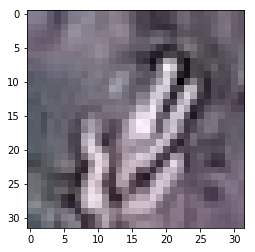

In [294]:
im = cv2.imread("./train/train/00a8c7e14298819281fe1a81434d19c4.jpg") #reading the image file from directory.Cactus
plt.imshow(im)                                                        #Ploting the image         

### Plotting Image Intensity Histogram

<function matplotlib.pyplot.show(*args, **kw)>

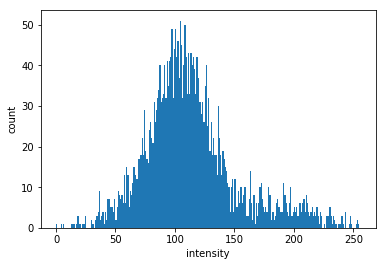

In [297]:
plt.hist(im.ravel(),256,[0,256]) # plotting thehistogram
plt.xlabel("intensity")
plt.ylabel("count")
plt.show


### Loading the Benchmark model VGG16

In [4]:
'''Loading the pre trained model'''

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,  
                  input_shape=(32, 32, 3)) 



Instructions for updating:
Colocations handled automatically by placer.


In [5]:
vgg16_net.trainable = False # trainable parameter set as false
vgg16_net.summary()         #summary of the architecture. 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

### Benchmark output layer

In [6]:
'''Creating the CNN for training the data and to obtained the desired output'''
model = Sequential()     
model.add(vgg16_net)          # to load the pre trained model
model.add(Flatten())          # to convert two dimensional array into a vector
model.add(Dense(256))         # it is a fully connected layer 
model.add(Activation('relu')) # This layer decides the vaues which are to be passed further the ones to be held back
model.add(Dropout(0.5))       # This layer helps in removing the overfitting from the layer to make it mor generalised
model.add(Dense(1))           # this is a fully connected layer which gives a single output
model.add(Activation('sigmoid')) # activation functio for making a decision
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
___________________________

### Compiling the model archictecture


In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])       # compiles the architecture before fitting the data
                                          # the optimizers help in deciding the weights for the network 

### Preprocessing the data

In [8]:
X_tr = [] # variable to hold image data
Y_tr = [] # variable to hold the id's of the image data
imges = train_df['id'].values   # Values being assigned from the data frame
for img_id in tqdm_notebook(imges):
    X_tr.append(cv2.imread(train_dir + img_id))     # appending the data to the variable    
    Y_tr.append(train_df[train_df['id'] == img_id]['has_cactus'].values[0])  
    ''' the id's when they match with the file names are store in the variable for the id'''
X_tr = np.asarray(X_tr)         # is converted to array
X_tr = X_tr.astype('float32')   # array is converterd to floating type array
X_tr /= 255                     # the float array scaled down to a value between 0 to 1. 
Y_tr = np.asarray(Y_tr)         # the id's are converted into an array

### Training the Model

In [10]:
batch_size = 32 # number images in one batch 
nb_epoch = 100  # number of epochs or repeatations

In [11]:
%%time
# Train model
history = model.fit(X_tr, Y_tr,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2) 

Instructions for updating:
Use tf.cast instead.
Train on 15750 samples, validate on 1750 samples
Epoch 1/100
 - 239s - loss: 0.7186 - acc: 0.5663 - val_loss: 0.5138 - val_acc: 0.7463
Epoch 2/100
 - 222s - loss: 0.5126 - acc: 0.7539 - val_loss: 0.4366 - val_acc: 0.7514
Epoch 3/100
 - 241s - loss: 0.4396 - acc: 0.7905 - val_loss: 0.3744 - val_acc: 0.7960
Epoch 4/100
 - 235s - loss: 0.3822 - acc: 0.8274 - val_loss: 0.3329 - val_acc: 0.8406
Epoch 5/100
 - 237s - loss: 0.3437 - acc: 0.8494 - val_loss: 0.2985 - val_acc: 0.8983
Epoch 6/100
 - 233s - loss: 0.3103 - acc: 0.8721 - val_loss: 0.2719 - val_acc: 0.9183
Epoch 7/100
 - 274s - loss: 0.2852 - acc: 0.8897 - val_loss: 0.2501 - val_acc: 0.9303
Epoch 8/100
 - 287s - loss: 0.2610 - acc: 0.9018 - val_loss: 0.2336 - val_acc: 0.9331
Epoch 9/100
 - 290s - loss: 0.2447 - acc: 0.9135 - val_loss: 0.2187 - val_acc: 0.9394
Epoch 10/100
 - 284s - loss: 0.2290 - acc: 0.9204 - val_loss: 0.2063 - val_acc: 0.9411
Epoch 11/100
 - 266s - loss: 0.2169 - acc:

### Visualisations
The following visualisation are for the VGG16 trained model metric generated for: 
* Validation Loss and Training Loss
* Validation Accuracy and Training Accuracy

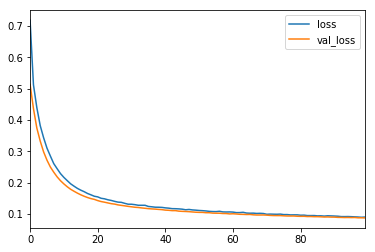

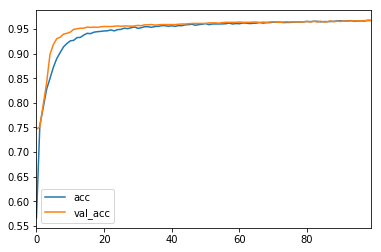

In [12]:
with open('history.json', 'w') as f:   #opening the json file as f
    json.dump(history.history, f)      #Converting json to string 

history_df = pd.DataFrame(history.history)  #converting to dataframe
history_df[['loss', 'val_loss']].plot()     # using the data fram for plot
history_df[['acc', 'val_acc']].plot()

### Test images preparation  and prediction

In [34]:
%%time
X_tst = []                                          # for holding the images a blank list
Test_imgs = []                                      # for holding the imge id blank list
for img_id in tqdm_notebook(os.listdir(test_dir)):  # converting the location value into a tqdm notebook
    #print(img_id)
    X_tst.append(cv2.imread(test_dir + img_id))     # appending the values after reading an image file from the given location
    Test_imgs.append(img_id)                        # appending the location and file name to a variable
X_tst = np.asarray(X_tst)                           # converting the read images into array
X_tst = X_tst.astype('float32')                     # converting the read images into float 
X_tst /= 255                                        # rducing the vlaues in the range of 0 to 1


Wall time: 2.21 s


In [35]:
# prediction after training
test_predictions = model.predict(X_tst)

In [276]:
sub_df = pd.DataFrame(test_predictions, columns=['has_cactus']) #taking a particular data frame field

''' Assigning 1 to values greater than 0.75 or else 0 best on the prediction made'''

#sub_df['has_cactus'] = sub_df['has_cactus'].apply(lambda x: 1 if x > 0.75 else 0) 

' Assigning 1 to values greater than 0.75 or else 0 best on the prediction made'

In [236]:
sub_df['id'] = ''                  
cols = sub_df.columns.tolist()       # converting the columns to list
cols = cols[-1:] + cols[:-1]         # adding columns from last  
sub_df=sub_df[cols]                  

In [237]:
for i, img in enumerate(Test_imgs): 
    sub_df.set_value(i,'id',img)         # assigning id's to the column using image name

c:\users\aditya~1\env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [238]:
sub_df.head()  #the value of the head along with a few data

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,1
1,0017242f54ececa4512b4d7937d1e21e.jpg,1
2,001ee6d8564003107853118ab87df407.jpg,0
3,002e175c3c1e060769475f52182583d0.jpg,0
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,1


## Prediction by the bench mark model

### Prediction stored in csv format 

In [240]:
sub_df.to_csv('submissionVGG16.csv',index=False) # generating a submission csv file with prediction

### Image prediction sample

ValueError: num must be 1 <= num <= 8, not 9

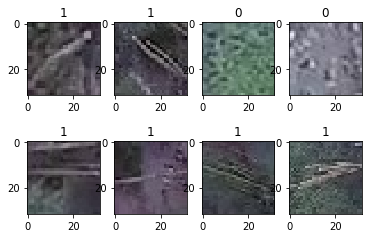

In [266]:
'''Loading the predicted images'''
imagess=[] # empty list
has=[]     # empty list
for img_id in tqdm_notebook(os.listdir(test_dir)):   # test directory opened and the images converted to list of file names
    imagess.append(cv2.imread(test_dir + img_id))    # the image file read and stored in variables as float array
    
for elem in tqdm_notebook(sub_df['has_cactus']):     # Using the id stored
    has.append(elem)                                 # value of prediction stored
j=0
for im in imagess:                                   
    plt.subplot(2,4,j+1)                             # subplot with variable index
    title(has[j])                                    # title corresponding the value of lrdiction for each subplot
    plt.imshow(im)                                   # plotting image as matplot lib
    j+=1                                             # increamenting index 
plt.show()                                           # diplaying sbplot

## Solution Model

### Loading the ResNet50  model

In [267]:
base_model=ResNet50(weights="imagenet",include_top=False,input_shape=(32,32,3)) #loading resnet model

### Adding the output layers into the base model

In [ ]:
def add_new_layer(base_model):
    x=base_model.output                                 # output layer for the pre-trained model
    x=Flatten()(x)                                      # reducing dimensioanlity 
    x=Dense(512,activation="relu")(x)                   # Fully connected layer  
    predictions = Dense(1, activation='sigmoid',activity_regularizer=regularizers.l1(0.05))(x) #activation layer
    model = Model(input=base_model.input, output=predictions)     #final layer for predictions
    return model


### Compiling the model

In [268]:


def transfer_learn(model, base_model):
    for layer in base_model.layers:
        layer.trainable = True
    model.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy',  # compiling the model 
                  metrics=['accuracy'])

In [269]:
train_df["has_cactus"]=train_df["has_cactus"].map(lambda x:str(x))   #converting the dataframe value to string

### Pre Processing the data

In [270]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 validation_split=0.1,
                                 rotation_range=30,
                                 shear_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 zoom_range=0.2)          # image data generator
train_generator=train_datagen.flow_from_dataframe(        # train generator
    dataframe=train_df,
    directory=train_dir,
    x_col="id",
    y_col="has_cactus",
    batch_size=10,
    shuffle=True,
    class_mode="binary",
    target_size=(32,32),
    subset='training')

validation_generator=train_datagen.flow_from_dataframe(      #validation generator
    dataframe=train_df,
    directory=train_dir,
    x_col="id",
    y_col="has_cactus",
    batch_size=10,
    shuffle=True,
    class_mode="binary",
    target_size=(32,32),
    subset='validation')

Found 15750 images belonging to 2 classes.
Found 1750 images belonging to 2 classes.


### Adding output layers

In [7]:
model_res=add_new_layer(base_model) #generating the output layers with the model 

c:\users\aditya~1\env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [12]:
print(model_res.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

### Calling the compile function

In [15]:
transfer_learn(model_res, base_model)

### training the model

In [16]:
 %%time
#train model
history_2=model_res.fit_generator(generator=train_generator,
                            validation_data=validation_generator,
                            validation_steps=int(train_df.shape[0]/32),
                            steps_per_epoch=int(train_df.shape[0]/32),
                            epochs=100,
                            verbose=2)

Epoch 1/100
 - 1217s - loss: 0.7423 - acc: 0.8244 - val_loss: 0.7056 - val_acc: 0.8886
Epoch 2/100
 - 1241s - loss: 0.6009 - acc: 0.8995 - val_loss: 0.6267 - val_acc: 0.9253
Epoch 3/100
 - 1122s - loss: 0.5571 - acc: 0.9211 - val_loss: 0.6683 - val_acc: 0.9341
Epoch 4/100
 - 1072s - loss: 0.5554 - acc: 0.9240 - val_loss: 0.6098 - val_acc: 0.9462
Epoch 5/100
 - 1076s - loss: 0.5258 - acc: 0.9326 - val_loss: 0.5459 - val_acc: 0.9551
Epoch 6/100
 - 21262s - loss: 0.5174 - acc: 0.9386 - val_loss: 0.5705 - val_acc: 0.9579
Epoch 7/100
 - 1062s - loss: 0.5077 - acc: 0.9471 - val_loss: 0.5052 - val_acc: 0.9663
Epoch 8/100
 - 7688s - loss: 0.5100 - acc: 0.9386 - val_loss: 0.5324 - val_acc: 0.9658
Epoch 9/100
 - 1071s - loss: 0.5064 - acc: 0.9465 - val_loss: 0.6251 - val_acc: 0.9571
Epoch 10/100
 - 968s - loss: 0.4835 - acc: 0.9540 - val_loss: 0.6330 - val_acc: 0.9614
Epoch 11/100
 - 960s - loss: 0.4793 - acc: 0.9593 - val_loss: 0.5158 - val_acc: 0.9722
Epoch 12/100
 - 959s - loss: 0.4766 - acc:

### Visualisations
The following visualisation are for the ResNet50 trained model metric generated for: 
* Validation Loss and Training Loss
* Validation Accuracy and Training Accuracy

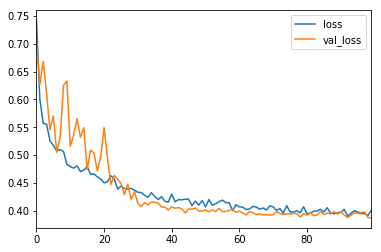

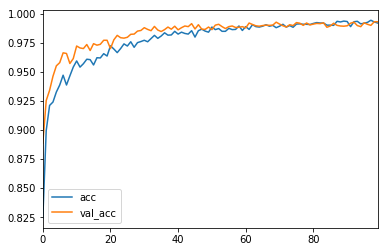

In [17]:
history_2_df = pd.DataFrame(history_2.history)
history_2_df[['loss', 'val_loss']].plot()
history_2_df[['acc', 'val_acc']].plot()

### Test images preparation  and prediction

In [18]:
%%time
X_tst = []
Test_imgs = []
for img_id in tqdm_notebook(os.listdir(test_dir)): # test directory opened and the images converted to list of file names
    X_tst.append(cv2.imread(test_dir + img_id))     
    Test_imgs.append(img_id)
X_tst = np.asarray(X_tst)
X_tst = X_tst.astype('float32')
X_tst /= 255


Wall time: 27.5 s


In [74]:
test_predictions = model_res.predict(X_tst)


In [279]:
sub_df = pd.DataFrame(test_predictions, columns=['has_cactus'])

''' Assigning 1 to values greater than 0.75 or else 0 best on the prediction made'''

sub_df['has_cactus'] = sub_df_2['has_cactus'].apply(lambda x: 1 if x > 0.75 else 0)


In [22]:
sub_df_2['id'] = ''
cols = sub_df_2.columns.tolist()
cols = cols[-1:] + cols[:-1]
sub_df_2=sub_df_2[cols]

In [23]:
for i, img in enumerate(Test_imgs):
    sub_df_2.set_value(i,'id',img)   # assigning id's to the column using image name

c:\users\aditya~1\env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [28]:
sub_df_2.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,1
1,0017242f54ececa4512b4d7937d1e21e.jpg,1
2,001ee6d8564003107853118ab87df407.jpg,0
3,002e175c3c1e060769475f52182583d0.jpg,0
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,1


## Prediction by the solution model

### Prediction stored in csv format

In [27]:
sub_df_2.to_csv('submissionResNet50.csv',index=False) # generating a submission csv file with prediction

### Image prediction sample

ValueError: num must be 1 <= num <= 10, not 11

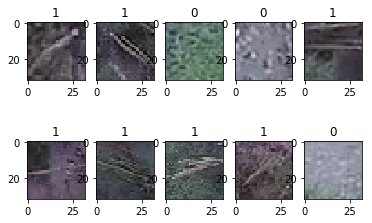

In [262]:


imags=[]
has_val=[]
for img_id in tqdm_notebook(os.listdir(test_dir)):   # test directory opened and the images converted to list of file names
    imags.append(cv2.imread(test_dir + img_id))      # the image file read and stored in variables as float array            
    
    
# value of prediction stored




 # diplaying sbplot
for elem in tqdm_notebook(sub_df_2['has_cactus']): # Using the id stored
    has_val.append(elem)                           # value of prediction stored
j=0
for im in imags:
    plt.subplot(2,5,j+1)                           # subplot with variable index
    title(has_val[j])                              # title corresponding the value of lrdiction for each subplot
    plt.imshow(im)                                 # plotting image as matplot lib
    j+=1                                           # increamenting index  
plt.show()                                         